# Анализ рынка компьютерных игр

В проекте используются исторические данные (до 2016 года) о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Задача - выявить определяющие успешность игры закономерности. Представим, что сейчас декабрь 2016 года, и нужно спланировать кампанию на 2017-й.

Дисклеймер: данные за 2016 год могут быть неполными.

**Описание данных**

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию:
    - Е - без возрастных ограничений
    - Е10+ - для детей старше 10 лет
    - М - материалы не подходят для подростков младше 17 лет
    - Т - для людей старше 13 лет.

**Структура работы**

1. [Загрузка данных и первый взгляд](#data_import)
    - [Вывод](#sum_up_1) 
2. [Предобработка данных](#data_processing)
    - [Вывод](#sum_up_2)
3. [Исследовательский анализ данных](#data_analysis)
    - [Вывод](#sum_up_3)
4. [Портрет пользователя по регионам](#user)
    - [Вывод](#sum_up_4)
5. [Проверка гипотез](#hypotheses)
    - [Вывод](#sum_up_5)
6. [Общий вывод](#sum_up)

<a id="data_import"></a>
## Загрузка данных и первый взгляд

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy import stats as st

In [2]:
df = pd.read_csv('games.csv')

In [3]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
df.tail(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
df.isna().mean().sort_values(ascending=False) * 100

Critic_Score       51.319174
Rating             40.478612
User_Score         40.089740
Year_of_Release     1.609333
Genre               0.011965
Name                0.011965
Other_sales         0.000000
JP_sales            0.000000
EU_sales            0.000000
NA_sales            0.000000
Platform            0.000000
dtype: float64

<a id="sum_up_1"></a>
**Вывод**

- В базе 16 715 игр
- От 40% до 50% данных пропущенно в столбцах возрастной рейтинг, оценка критиков и пользователей
- Около 1,6% пропусков года выпуска и единичные пропуски жанра и названия
- Тип данных год выпуска `float` из-за наличия пропущенных значений
- Тип данных `user_score` - строка, поскольку встречаются значения `tbd`

<a id="data_processing"></a>
## Предобработка данных

Приведем все названия столбцов к нижнему регистру.

In [7]:
df.columns = df.columns.str.lower()

Обработаем пропуски года выпуска, названия игры и жанра.

In [8]:
df[df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуски жанра и названия совпадают, их всего два, поэтому просто удалим их.

In [9]:
df = df.dropna(subset=['genre'])

Год выпуска не заполнен более, чем в 1,6% случаев, это слишком много для того, чтобы просто удалить эти наблюдения, поэтому заменим пропуски на значение-маркер и отформатируем данные столбца в целочисленные значения.

In [10]:
df['year_of_release'] = df['year_of_release'].fillna(1929).astype('int')

In [11]:
df.isna().mean().sort_values(ascending=False) * 100

critic_score       51.313349
rating             40.471489
user_score         40.082570
other_sales         0.000000
jp_sales            0.000000
eu_sales            0.000000
na_sales            0.000000
genre               0.000000
year_of_release     0.000000
platform            0.000000
name                0.000000
dtype: float64

Остальных пропусков слишком много, чтобы их выбросить, а данными для точного заполнения мы не располагаем, поэтому оставим пропуски в этих столбцах как есть.

Значения `tbd` в пользовательских оценках заменим на NaN и заменим тип столбца на `float`.

In [12]:
df = df.replace('tbd', np.nan)
df['user_score'] = df['user_score'].astype('float')

Также для дальнейшей работы добавим столбец `total_sales`, куда сохраним сумму всех проданных копий игры.

In [13]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

<a id="sum_up_2"></a>
**Вывод**

- Удалены пропуски в столбцах названия и жанр игры
- Пропущенные годы выпуска заменены на значение-маркер, а сам тип столбца заменен на целочисленный
- Значения `tbd` в переменной `user_score` заменены на NaN, переменной присвоен тип `float`
- Добавлена переменная `total_sales` с общей суммой проданных копий игры по всему миру
- Пропуски в столбцах `user_score`, `rating`, `critic_score` оставлены как есть, поскольку нет возможности их правдоподобно заполнить.

<a id="data_analysis"></a>
## Исследовательский анализ данных

Для начала узнаем, сколько игр выпускалось в разные годы и как они продавались на различных платформах.

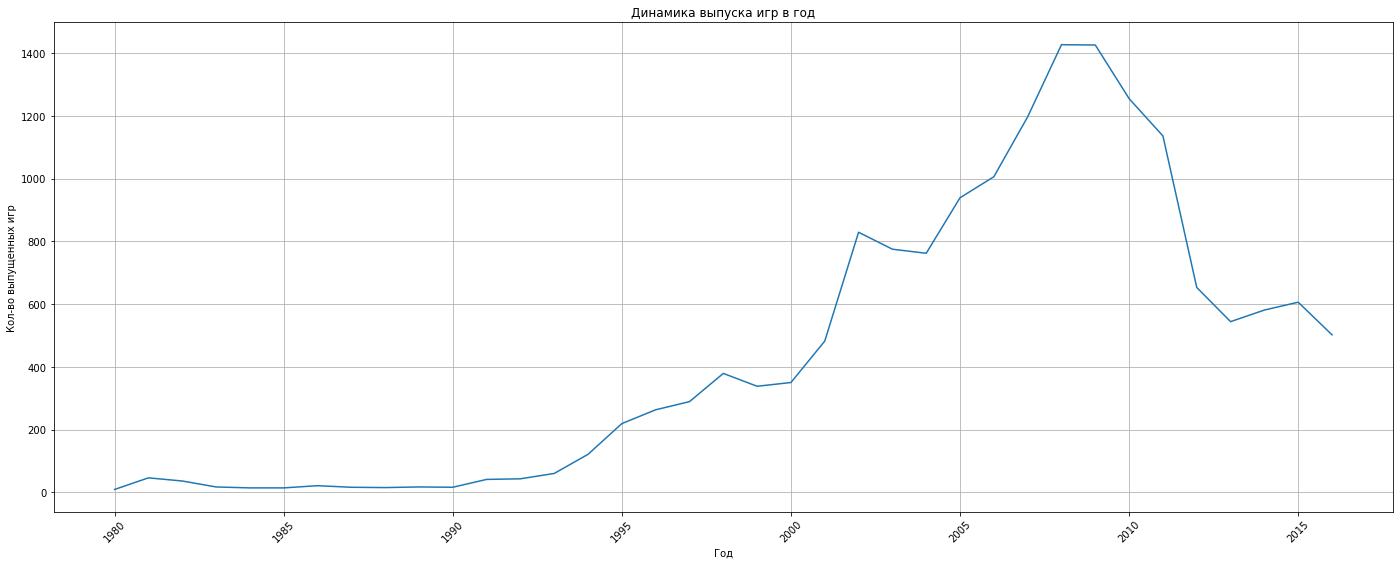

In [14]:
ax = (df[df['year_of_release'] != 1929]
     .groupby('year_of_release')['year_of_release']
     .count()
     .plot(figsize=(24,9), grid=True, rot=45, color='tab:blue')
)
ax.set_title('Динамика выпуска игр в год')
ax.set_ylabel('Кол-во выпущенных игр')
ax.set_xlabel('Год');

До середины 90-х годов всего в мире выпускалось несколько десятков игр. Устойчивый рост наметился с 1993 года, а пик игровой индустрии пришелся на 2008-2009 годы. К 2015 году количество выпускаемых игр упало до уровня начала 00-х. Вероятно, такое падение связано с ростом индустрии мобильных игр: мелкие проекты, не требующие большого времени для разработки перешли на Android и iOS, а на классических игровых платформах остались более ресурсоемкие в плане разработки и более малочисленные проекты.

Какие платформы исторически более успешны и на какой временной период приходился их пик?

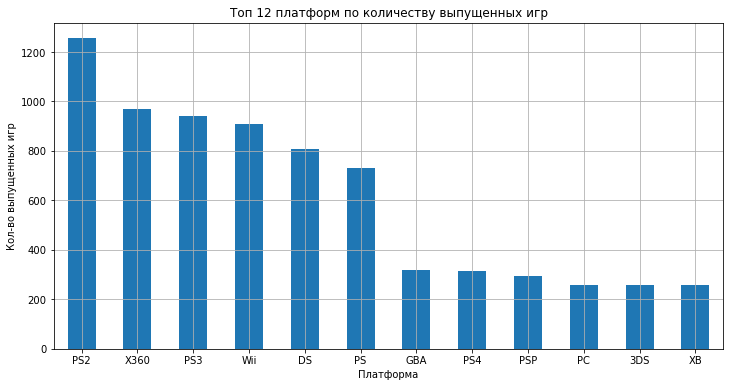

In [15]:
ax = (df
     .groupby('platform')['total_sales'].sum()
     .sort_values(ascending=False)[:12]
     .plot.bar(rot=360, grid=True, figsize=(12,6), color='tab:blue')
)
ax.set_title('Топ 12 платформ по количеству выпущенных игр')
ax.set_ylabel('Кол-во выпущенных игр')
ax.set_xlabel('Платформа');

In [16]:
top_platforms = list(df
     .groupby('platform')['total_sales'].sum().reset_index()
     .sort_values(by='total_sales', ascending=False)['platform'][:10])

In [17]:
sales = (df[(df['year_of_release'] != 1929) & (df['platform'].isin(top_platforms))]
     .pivot_table(index='year_of_release', values='total_sales', columns='platform', aggfunc='sum')
)

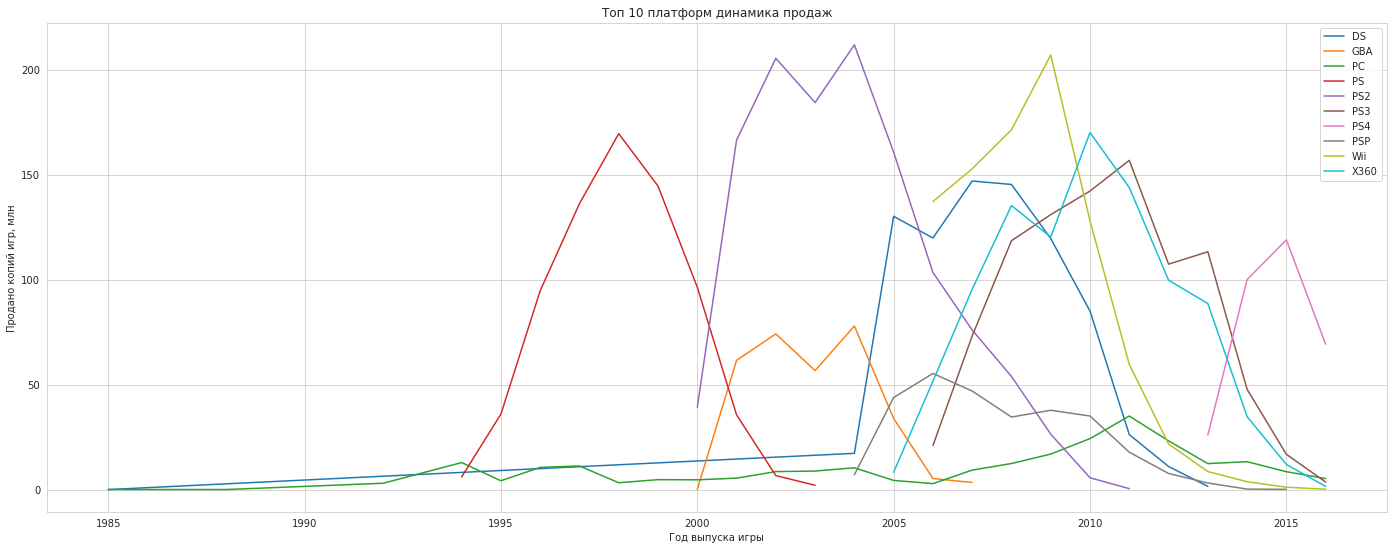

In [18]:
plt.figure(figsize=(24,9))
sns.set_style("whitegrid")
ax = sns.lineplot(data=sales, dashes=False)
ax.set_title('Топ 10 платформ динамика продаж')
ax.set_ylabel('Продано копий игр, млн')
ax.set_xlabel('Год выпуска игры');

Примерно на каждые 3-5 лет, начиная с 1993 года (выход первой версии Sony PlayStation) приходится пик популярности новой игровой платформы.

Возьмем для дальнейшего анализа актуальный период, начиная с 2013 года - выход Sony PS4 и Xbox ONE.

In [19]:
actual = df.query('year_of_release >= 2013')

In [20]:
len(actual['platform'].unique())

11

Всего 11 различных игровых платформ в текущем периоде. Посмотрим на динамику продаж игр на топ 5 платформах.

In [21]:
top_actual_platforms = list(actual.groupby('platform')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)['platform'][:5])

In [22]:
actual_sales = actual[(actual['year_of_release'] != 1929) & (actual['platform'].isin(top_actual_platforms))].pivot_table(index='year_of_release', values='total_sales', columns='platform', aggfunc='sum')

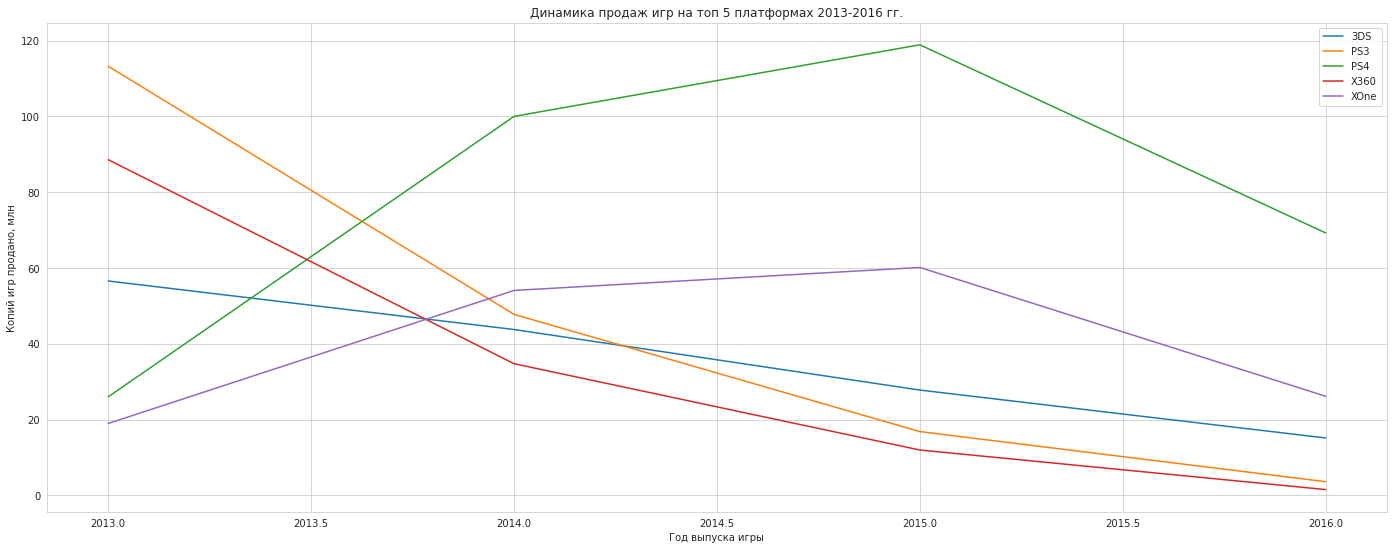

In [23]:
plt.figure(figsize=(24,9))
sns.set_style("whitegrid")
ax = sns.lineplot(data=actual_sales, dashes=False)
ax.set_title('Динамика продаж игр на топ 5 платформах 2013-2016 гг.')
ax.set_ylabel('Копий игр продано, млн')
ax.set_xlabel('Год выпуска игры');

С выходом XOne и PS4 платформы этих производителей предыдущего поколения PS3 и X360 пошли на спад. Отрыв PS4 от XOne выглядит более значительным, чем отрыв консоли от Sony предыдущего поколения от приставки Microsoft за этот же период.

Как распределены продажи игр в разрезе каждой из платформ?

In [24]:
actual.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.0,0.472772,1.381347,0.01,0.0400,0.090,0.2800,14.60
DS,8.0,0.192500,0.172026,0.03,0.0675,0.150,0.2525,0.51
PC,189.0,0.208624,0.352304,0.01,0.0300,0.080,0.2300,3.05
PS3,345.0,0.525884,1.451939,0.01,0.0400,0.150,0.5100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.200,0.7300,14.63
PSP,67.0,0.052239,0.059768,0.01,0.0150,0.020,0.0700,0.24
PSV,358.0,0.092151,0.153816,0.01,0.0200,0.040,0.1100,1.96
Wii,23.0,0.593913,0.915432,0.01,0.0450,0.180,0.7550,3.58
WiiU,115.0,0.562000,1.038778,0.01,0.0600,0.200,0.5950,7.09


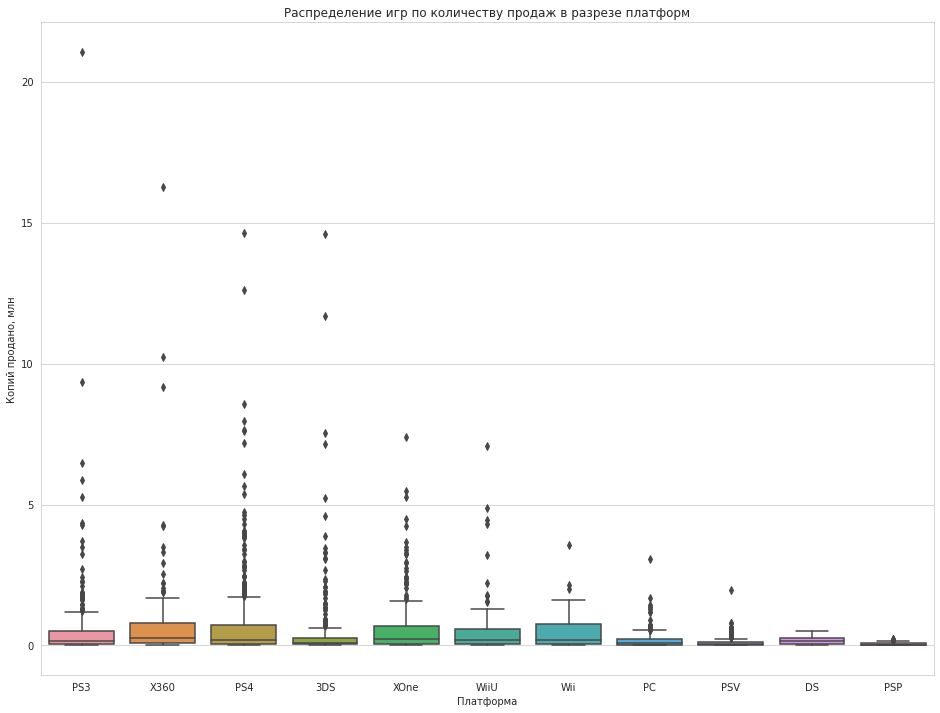

In [25]:
plt.figure(figsize=(16,12))
ax = sns.boxplot(x='platform', y='total_sales', data=actual)
ax.set_title('Распределение игр по количеству продаж в разрезе платформ')
ax.set_ylabel('Копий продано, млн')
ax.set_xlabel('Платформа');

Sony укрепила позиции по отношению к Xbox в новом поколении. Если у X360 средние и медианные продажи выше соответственно на 200 и 280 тыс. копий, чем у PS3, то в новом поколении средние продажи уже выше у Sony на 150 тыс. копий. Медианные продажи выше у XOne на 20 тыс. копий. Судя по количеству выбросов в новом поколении и серьезном отличии среднего значения от медианного (до 4 раз), можно сделать вывод, что борьба между PS4 и XOne ведется на поле эксклюзивов.

Nintendo 3DS, входящая в пятерку по продажам игр этого периода, имеет совокупные показатели также за счет очень успешных проектов относительно остальных игр платформы в целом - средние продажи в 5 раз выше медианных.

Интересно, влияют ли оценки критиков и пользователей на продажи? Посмотрим на примере PS4, поскольку это популярная платформа с наибольшим количеством выпущенных игр за рассматриваемый период.

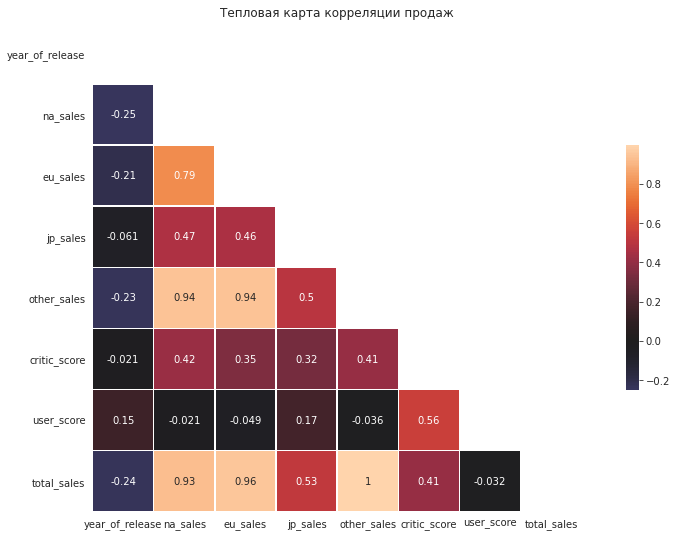

In [26]:
corr = actual[actual['platform'] == 'PS4'].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(16,9))
ax = sns.heatmap(corr, mask=mask, center=0, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
ax.set_title('Тепловая карта корреляции продаж');

Оценка пользователей практически не связана с продажами игры, а вот оценка критиков имеет среднюю положительную корреляцию с продажами. Похоже, что больше всего к критикам прислушиваются в североамериканском регионе, а меньше всего - в Японии.

Интересно, что в Японии также можно заметить слабую положительную связь продаж с пользовательской оценкой, тогда как во всех остальных регионах коэффициент корреляции продаж с пользовательской оценкой отрицательный, пускай и ничтожно мал. 

Получается, что японские игроки больше доверяют оценкам друг друга, чем игроки остального мира.

Связана ли упешность игры с ее жанром?

In [27]:
actual_genre = (actual[(actual['year_of_release'] != 1929)]
     .pivot_table(index='genre', values='total_sales', aggfunc='sum')
     .sort_values(by='total_sales', ascending=False)
)

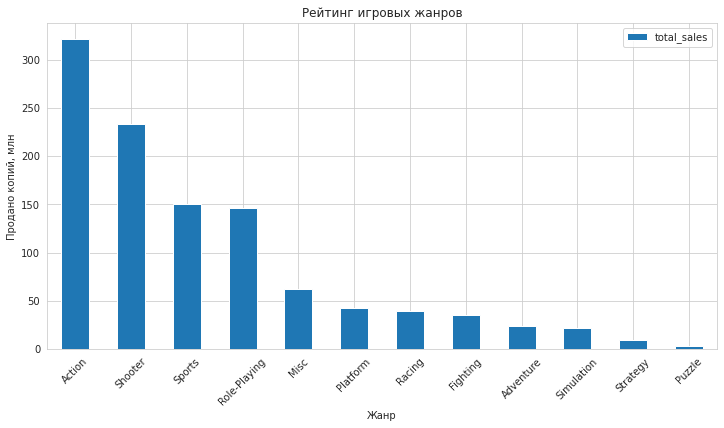

In [28]:
ax = actual_genre.plot(kind='bar', color='tab:blue', figsize=(12,6), rot=45)
ax.set_title('Рейтинг игровых жанров')
ax.set_ylabel('Продано копий, млн')
ax.set_xlabel('Жанр');

Экшн-игры, шутеры, спортивные и РПГ достаточно популярны, а вот в головоломки, стратегии и симуляторы практически не играют.

<a id="sum_up_3"></a>
**Вывод**

- До выхода первой PS в 1993 году в игровой индустрии ежегодно выходило лишь несколько десятков игр.
- С 2009 количество выпускаемых игр стало резко падать, достигнув своего пика. Вероятно, с 2009 года мелкие игровые проекты стали чаще создаваться под мобильные телефоны, iOS и Android. В 2010 году вышел первый iPhone, в 2008 году вышел первый смартфон на Android.
- Примерно каждые 3-5 лет на пик популярности выходит новая игровая платформа или ее поколение. В 2013 году вышли PS4 и XOne, запустив тем самым новый цикл.
- Текущее поколение консолей характеризуется ставкой на эксклюзивы: медианные продажи популярных платформ текущего поколения (PS4, XOne, 3DS) в 3-5 раз превышают средние показатели.
- Оценки критиков имеют некоторое положительное влияние на продажи игр (0,41 коэффициент корреляции). Пользовательские оценки практически не оказывают никакого влияния на продажи.
- Уникальная ситуация на японском рынке: минимальный коэффициент корреляции продаж с оценками критиков (0,32), при этом максимальный и единственный положительный коэффициент корреляции продаж с пользовательскими оценками (0,17). В Японии меньше всего доверяют критикам и больше всего прислушиваются к мнению обычных игроков.
- Наиболее популярные жанры: экшн, шутеры, спортивные, РПГ. Наименее популярные: головоломки, стратегии, симуляторы.

<a id="user"></a>
## Портрет пользователя по регионам

Посмотрим внимательнее на различия североамериканского, европейского и японского рынков:
- какие популярные платформы на каждом из рынков?
- какие популярные жанры?
- как влияет рейтинг ESRB на популярность игр?

In [29]:
na_top_platforms = list(actual.groupby('platform')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)['platform'][:5])
na_sales = actual[(actual['year_of_release'] != 1929) & (actual['platform'].isin(na_top_platforms))].pivot_table(index='year_of_release', values='na_sales', columns='platform', aggfunc='sum')

eu_top_platforms = list(actual.groupby('platform')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False)['platform'][:5])
eu_sales = actual[(actual['year_of_release'] != 1929) & (actual['platform'].isin(na_top_platforms))].pivot_table(index='year_of_release', values='eu_sales', columns='platform', aggfunc='sum')

jp_top_platforms = list(actual.groupby('platform')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False)['platform'][:5])
jp_sales = actual[(actual['year_of_release'] != 1929) & (actual['platform'].isin(na_top_platforms))].pivot_table(index='year_of_release', values='jp_sales', columns='platform', aggfunc='sum')

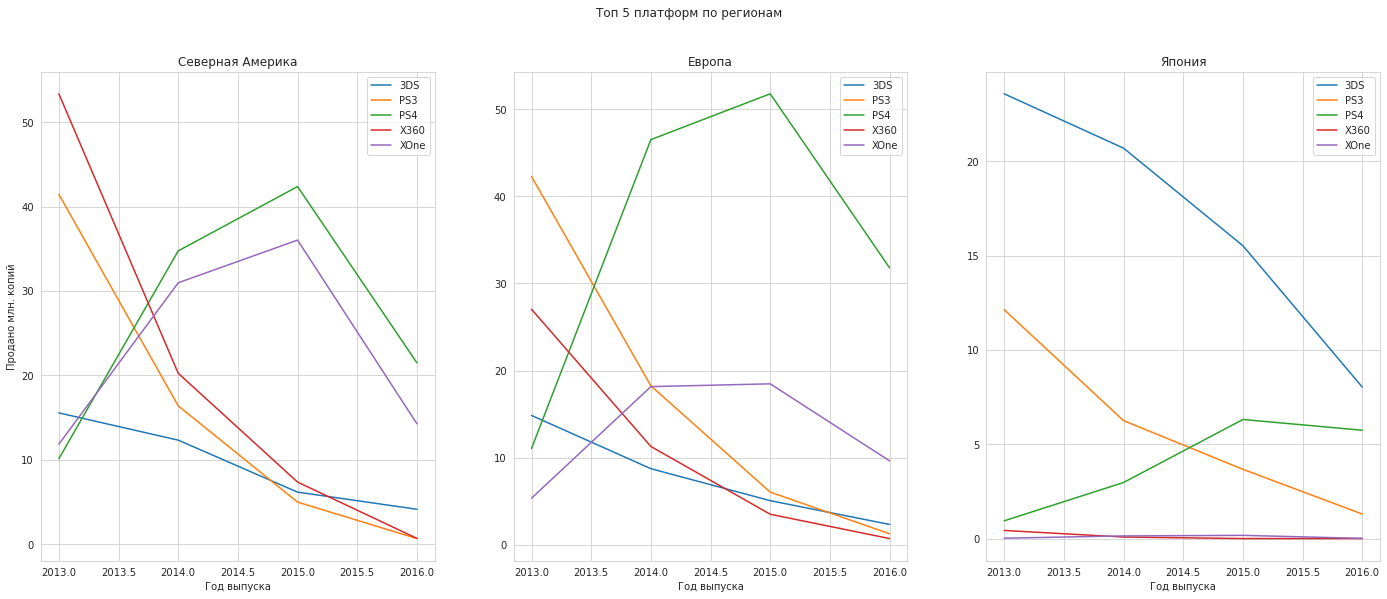

In [30]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(ncols=3, figsize=(24,9))
fig.suptitle('Топ 5 платформ по регионам')
sns.lineplot(data=na_sales, dashes=False, ax=axes[0])
axes[0].set_title('Северная Америка')
axes[0].set_ylabel('Продано млн. копий')
axes[0].set_xlabel('Год выпуска')
sns.lineplot(data=eu_sales, dashes=False, ax=axes[1])
axes[1].set_title('Европа')
axes[1].set_xlabel('Год выпуска')
sns.lineplot(data=jp_sales, dashes=False, ax=axes[2])
axes[2].set_title('Япония')
axes[2].set_xlabel('Год выпуска');

В Северной Америке PS и XBox жестко конкурируют друг с другом, PS4 лидирует с небольшим отрывом. В Европе PS4 находится вне конкуренции, совокупные продажи более, чем в 2 раза опережают продажи XOne. Японский рынок и здесь отличается: самая популярная платформа - Nintendo 3DS, но резко падает, PS4 набирает обороты и почти догнала 3DS. XBox в Японии вообще не пользуется популярностью по сравнению с Европой и Северной Америкой.

По объему рынок Северной Америки сопоставим с европейским. Японский рынок в несколько раз меньше.

In [31]:
na_top_genre = list(actual.groupby('genre')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)['genre'][:5])
na_genre = actual[(actual['year_of_release'] != 1929) & (actual['genre'].isin(na_top_genre))].pivot_table(index='year_of_release', values='na_sales', columns='genre', aggfunc='sum')

eu_top_genre = list(actual.groupby('genre')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False)['genre'][:5])
eu_genre = actual[(actual['year_of_release'] != 1929) & (actual['genre'].isin(na_top_genre))].pivot_table(index='year_of_release', values='eu_sales', columns='genre', aggfunc='sum')

jp_top_genre = list(actual.groupby('genre')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False)['genre'][:5])
jp_genre = actual[(actual['year_of_release'] != 1929) & (actual['genre'].isin(na_top_genre))].pivot_table(index='year_of_release', values='jp_sales', columns='genre', aggfunc='sum')

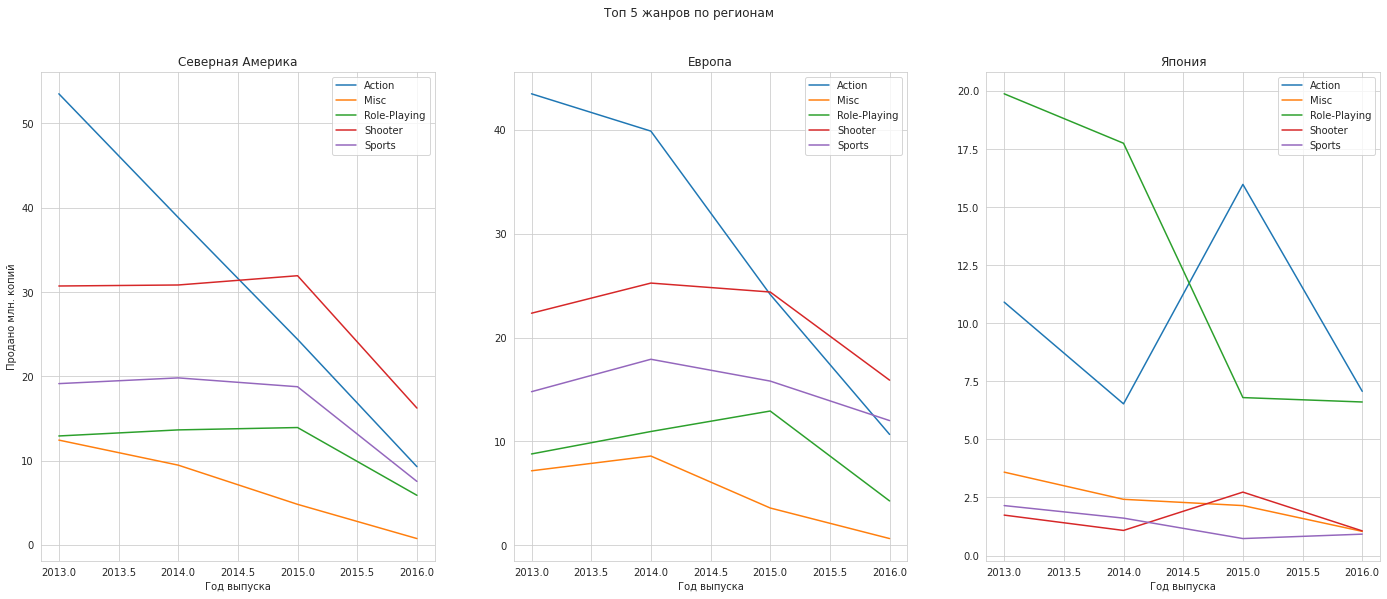

In [32]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(ncols=3, figsize=(24,9))
fig.suptitle('Топ 5 жанров по регионам')
sns.lineplot(data=na_genre, dashes=False, ax=axes[0])
axes[0].set_title('Северная Америка')
axes[0].set_ylabel('Продано млн. копий')
axes[0].set_xlabel('Год выпуска')
sns.lineplot(data=eu_genre, dashes=False, ax=axes[1])
axes[1].set_title('Европа')
axes[1].set_xlabel('Год выпуска')
sns.lineplot(data=jp_genre, dashes=False, ax=axes[2])
axes[2].set_title('Япония')
axes[2].set_xlabel('Год выпуска');

В Европе и Северной Америке за текущий период резко упала популярность экшн-игр, которые серьезно опережали игры других жанров. С 2015 года шутеры обогнали экшн-игры в обоих регионах, а в Европе спортивные игры вышли на второе место.

Японский рынок опять удивляет своей индивидуальностью. До 2015 года самым популярным жанром был РПГ, в 2015 его опередили экшн-игры, а в 2016 оба жанра сравнялись. Остальные жанры в Японии не так популярны. Вероятно, такие предпочтения связаны с популярностью игровых платформ и особенностью их игровых механик.

In [33]:
na_esrb = actual.pivot_table(index='rating', values='na_sales')
eu_esrb = actual.pivot_table(index='rating', values='eu_sales')
jp_esrb = actual.pivot_table(index='rating', values='jp_sales')

In [34]:
esrb = na_esrb.join([eu_esrb, jp_esrb])

In [35]:
esrb

,na_sales,eu_sales,jp_sales
rating,,,
E,0.261755,0.276026,0.050132
E10+,0.215238,0.169405,0.023373
M,0.447724,0.393821,0.038238
T,0.149520,0.125976,0.061832


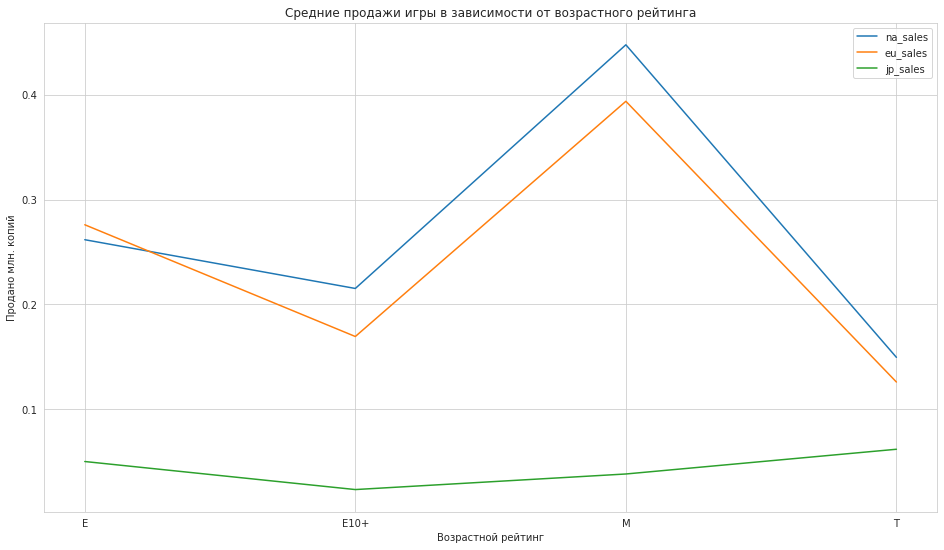

In [36]:
plt.figure(figsize=(16,9))
ax = sns.lineplot(data=esrb, dashes=False)
ax.set_title('Средние продажи игры в зависимости от возрастного рейтинга')
ax.set_ylabel('Продано млн. копий')
ax.set_xlabel('Возрастной рейтинг');

В среднем более охотно покупают игры с возрастным рейтингом 17+, детские и подростковые игры пользуются меньшей популярностью. В Японии в игры любой возрастной категории играют примерно одинаково. Опять же это может быть связано с популярностью 3DS, на которых множество платформеров с низкими возрастными ограничениями.

<a id="sum_up_4"></a>
**Вывод**

- XBox пользуется наибольшей популярностью в Северной Америке, но уступает PS4. В Европе PS4 идет с большим отрывом от остальных платформ. Японцы предпочитают 3DS, но к 2016 году обратили внимание на PS4, консоли от XBox на японском рынке практически не востребованы.
- В текущем поколении консолей на европейском и североамериканском рынке лидерство у экшн-игр перехватили шутеры. В Европе спортивные игры вышли на второе место. Японский рынок в основном сосредоточен на экшн-играх и РПГ.
- В Северной Америке и Европе игры 17+ намного популярнее игр с более низкими возрастными рейтингами (в 1,5-2 раза), в Японии играют в игры всех возрастных рейтингов примерно одинаково.
- Особые предпочтения к игровым жанрам в Японии вероятнее всего объясняются популярностью платформы 3DS, которая принципиально отличается от PS и XBox, поскольку является портативным устройством.

<a id="hypotheses"></a>
## Проверка гипотез

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.

Поясните:
- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.


Наконец, проверим две гипотезы:
- Средние пользовательские рейтинги игр на XOne и PC не отличаются;
- Средние пользовательские рейтинги экшн-игр и спортивных не отличаются.

In [37]:
actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [38]:
actual_full = actual.dropna(subset=['user_score'])

In [39]:
actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           1256 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 306.8+ KB


In [40]:
actual_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1192 entries, 16 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1192 non-null   object 
 1   platform         1192 non-null   object 
 2   year_of_release  1192 non-null   int64  
 3   genre            1192 non-null   object 
 4   na_sales         1192 non-null   float64
 5   eu_sales         1192 non-null   float64
 6   jp_sales         1192 non-null   float64
 7   other_sales      1192 non-null   float64
 8   critic_score     976 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           1150 non-null   object 
 11  total_sales      1192 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 121.1+ KB


В текущем периоде имеем всего 1192 игры с заполненной оценкой пользователей. Уровень статистической значимости установим 1%, поскольку выборка небольшая.

Сформулируем нулевую гипотезу:"средняя пользовательская оценка игры на XOne такая же, как средняя пользовательская оценка на PC".

Прежде, чем запустить тест, проверим дисперсии на равенство.

In [41]:
np.var(actual_full.query('platform == "XOne"')['user_score']) / np.var(actual_full.query('platform == "PC"')['user_score'])

0.6287553781936277

Дисперсии различаются на 62,8%, учтем это в тесте.

In [42]:
alpha = .01
    
results = st.ttest_ind(
    actual_full.query('platform == "XOne"')['user_score'], 
    actual_full.query('platform == "PC"')['user_score'],
    equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


По той же логике возьмем уровень статистической значимости для следующего теста 1%.

Нулевая гипотеза:"Средняя пользовательская оценка экшн-игры соответствует средней пользовательской оценке спортивной игры".

In [43]:
np.var(actual_full.query('genre == "Action"')['user_score']) / np.var(actual_full.query('genre == "Sports"')['user_score'])

0.5583552514566358

Дисперсии различаются.

In [44]:
alpha = .01
    
results = st.ttest_ind(
    actual_full.query('genre == "Action"')['user_score'], 
    actual_full.query('genre == "Sports"')['user_score'],
    equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


<a id="sum_up_5"></a>
**Вывод**

- Пользовательские оценки игр XOne и PC схожи. Это можно объяснить тем, что игры на XBox также доступны и на PC.
- Пользовательские оценки экшн и спортивных игр различаются.

<a id="sum_up"></a>
## Общий вывод

**Общие данные по рынку**

Мы проанализировали рынок компьютерных игр от истоков и до 2016 года. До выхода первой версии Sony PlayStation в 1993 году в мире в год выходило всего несколько десятков компьютерных игр. Появление игровых консолей привело к тому, что к 2008-2009 годам ежегодно производилось около 1,5 тыс. игр. Тем не менее, к 2015 году количество производимых ежегодно игр упало до уровня начала 00-х - около 600. Вероятнее всего, падение связано с появлением смартфонов на базе Android (2008 год) и iOS (2010 год). Мелкие проекты перешли на рынок мобильного гейминга.

В среднем каждые 3-5 лет популярной становится новая игровая платформа или новое поколение игровой консоли. С 2013 года выпускаются Sony PlayStation4 и Xbox ONE, с 2011 года выпускается Nintendo 3DS - это 3 самые популярные игровые платформы текущего поколения по состоянию на 2016 год. Особенность текущего поколения по сравнению с предыдущим заключается в максимизации прибыли за счет эксклюзивов: медианная прибыль превышает среднюю в 3-5 раз, а количество "игр-выбросов" по рекордным продажам увеличилось.

При этом оценки пользователей никак не влияют на продажи, а корреляция продаж с оценками критиков находится на среднем уровне и составляет 0,41. Исключением является японский рынок, где корреляция продаж с оценками критиков минимальна (0,31), а с пользовательскими оценками единственная положительная и самая высокая (0,17).

Отчетливо выделяются популярные жанры игр и жанры-аутсайдеры, в которые практически не играют. К популярным относятся экшн, шутеры, спортивные и РПГ. Меньше всего играют в головоломки, стратегии и симуляторы.

**Различия по регионам**

В Северной Америке лидирует PS4, XOne идет с небольшим отрывом позади. С 2015 года самым популярным жанром стал шутер, обогнав экшн. Игры с возрастным рейтингом 17+ в среднем в 2 раза популярнее, чем игры для более младших возрастных категорий.

Среди европейских игроков PS4 намного популярнее XOne. По совокупным продажам для PS4 продается примерно в 2,5 раза больше игр, чем для XOne. По жанровым предпочтениям шутеры также обогнали экшн. Однако в Европе с 2015 года на второе место вышли спортивные игры. Популярность игр в зависимости от возрастного рейтинга схожа с таковой на североамериканском рынке.

На японском рынке самой популярной остается Nintendo 3DS, но к 2016 году ее популярность сильно упала, а вторая по популярности PS4 практически догнала лидера. Два самых популярных жанра в Японии - экшн и РПГ, периодически сменяют друг друга. Возрастной рейтинг практически не влияет на популярность игры. В Японии специфичная ситуация на рынке. Вероятно, популярность 3DS влияет на предпочтения в жанрах и возрастных рейтингах игр в силу специфики портативной игровой консоли.

**Проверка гипотез**

Проверены две гипотезы на соответствие пользовательских оценок игр на XOne и PC, а также на соответствие этих оценок экшн и спортивных игр. В первом случае нулевую гипотезу не удалось отвергнуть: пользовательские оценки игр на XOne и PC схожи. Во втором случае нулевая гипотеза была отвергнута: экшн и спортивные игры в среднем имеют разные оценки.